# Question 1 - Portugese Language and Math Scores

In [48]:
# Loads the packages
import pandas as pd
import numpy as np


# Loads data
lang_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSCI_401_Exam_Files/student_portuguese_clean.csv")
math_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSCI_401_Exam_Files/student_math_clean.csv")
#lang_data.head()
#math_data.head()



In [59]:
# Part a)

# Filters for the students 18+ and finds students larger grade
lang_data_flt = lang_data[lang_data['age'] >= 18]
lang_data_flt['max_grade'] = lang_data_flt[['grade_1', 'grade_2']].max(axis=1)

# Groups by parents' occupation then calculates the average score
avg_max_grade = lang_data_flt.groupby(['mother_job', 'father_job'])['max_grade'].agg(['mean','count']).reset_index()

# Filters for the combination for more than five cases
combin_flt = avg_max_grade[avg_max_grade['count'] > 5]

# Finds the combination with the highest average grade
combin_final = combin_flt.sort_values(by="mean", ascending=False)

# Shows the result
print(f"\n",combin_final.head(1),"\n")


    mother_job father_job       mean  count
18    teacher   services  13.428571      7 



<ipython-input-59-457dde1b516f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_data_flt['max_grade'] = lang_data_flt[['grade_1', 'grade_2']].max(axis=1)


In [50]:
# Part b)

# Finds the mean age by sex and school and rounds it
mean_age = math_data.groupby(['sex','school'])['age'].mean().reset_index()
mean_age['age'] = mean_age['age'].round(1)

# Pivots wider by mean_age
mean_age_wider = mean_age.pivot(index = 'school', columns='sex', values='age').reset_index()
mean_age_wider.columns = ['school','mean_age_F','mean_age_M']

# Finds the mean final score by sex and school and rounds it
mean_final = math_data.groupby(['sex', 'school'])['final_grade'].mean().reset_index()
mean_final['final_grade'] = mean_final['final_grade'].round(2)

# Pivots wider by mean_final
mean_final_wider =  mean_final.pivot(index='school', columns='sex', values='final_grade').reset_index()
mean_final_wider.columns = ['school', 'mean_final_F', 'mean_final_M']

# Merges the two tables on school
merg = pd.merge(mean_age_wider, mean_final_wider, on='school')

# Shows the result
print(merg)

  school  mean_age_F  mean_age_M  mean_final_F  mean_final_M
0     GP        16.6        16.5          9.97         11.06
1     MS        17.8        18.2          9.92          9.76


<Figure size 1200x600 with 0 Axes>

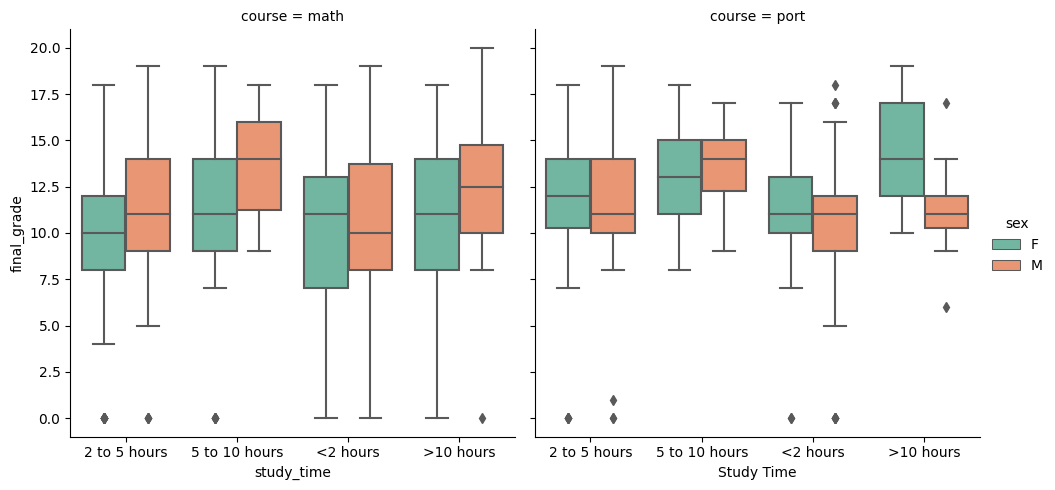

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns


# Part c)

# Adds variable course to data sets
math_data['course'] = 'math'
lang_data['course'] = 'port'

# Extracts columns from both data sets
math_clms = math_data[['final_grade', 'study_time', 'sex', 'course']]
lang_clms = lang_data[['final_grade', 'study_time', 'sex', 'course']]

# Combines two data sets
comb_clms = pd.concat([math_clms, lang_clms])

# Creates vertical side-by-side boxplots
plt.figure(figsize=(12, 6))
sns.catplot(x='study_time', y='final_grade', hue='sex', col='course', kind='box', data=comb_clms, palette='Set2')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

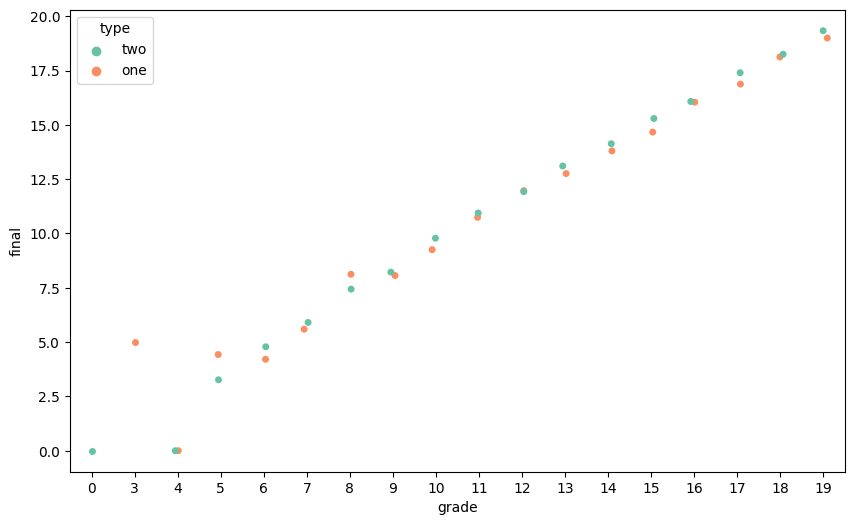

In [89]:
# Part d)

# Creates variable for average grade on final from first exam
math_data['type'] = 'one'
avg_grade_1 = math_data.groupby('grade_1').agg(avg_grade=('final_grade', 'mean')).reset_index()
avg_grade_1['type'] = 'one'
avg_grade_1 = avg_grade_1.rename(columns={'grade_1':'grade'})

# Creates variable for average grade on final from second exam
math_data['type'] = 'two'
avg_grade_2 = math_data.groupby('grade_2').agg(avg_grade=('final_grade', 'mean')).reset_index()
avg_grade_2['type'] = 'two'
avg_grade_2 = avg_grade_2.rename(columns={'grade_2':'grade'})

# Combines average grades
avg_grade = pd.concat([avg_grade_1, avg_grade_2])

# Creates scatter plot
plt.figure(figsize=(10,6))
sns.stripplot(x='grade', y='avg_grade', hue='type', data=avg_grade, palette='Set2')
plt.xlabel('grade')
plt.ylabel('final')
plt.legend(title='type')
plt.show()

# Question 2 - Spotify

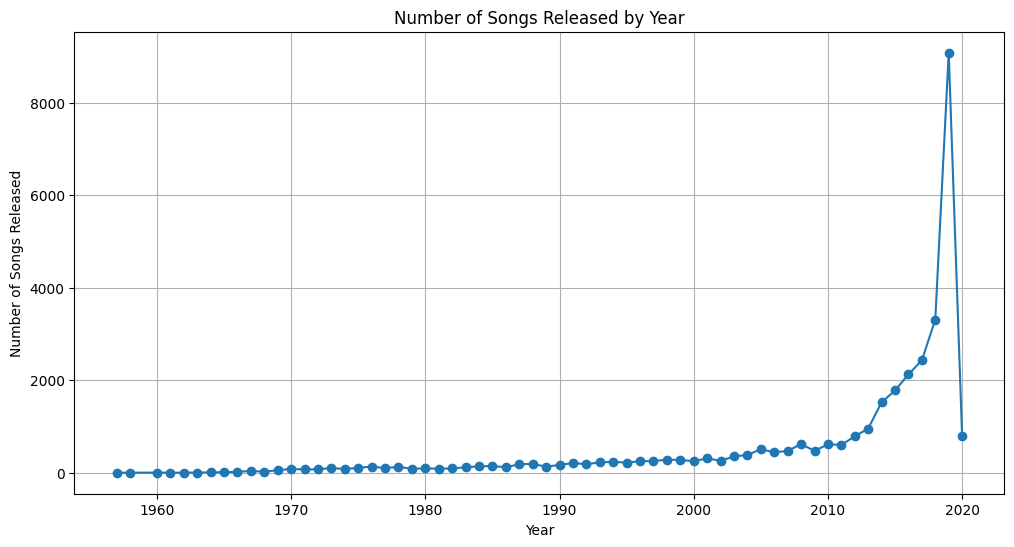

In [84]:
# Loads the data
spotify = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DSCI_401_Exam_Files/spotify_songs.csv")

# Converts release date to datetime
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date'])

# Extracts release year
spotify['release_year'] = spotify['track_album_release_date'].dt.year

# Plots the line plot
songs_per_year = spotify['release_year'].value_counts().sort_index()
songs_per_year.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Number of Songs Released by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs Released')
plt.grid(True)
plt.show()

In [97]:
# Extracts release month from the release date
spotify['release_month'] = spotify['track_album_release_date'].dt.month

# Removes songs with only release year
spotify_flt = spotify.dropna(subset=['track_album_release_date'])

# Finds 5 most danceable songs for each release month
top_5_danceable = (
    spotify_flt.groupby('release_month')
    .apply(lambda group: group.nlargest(5, 'danceability'))
    .reset_index(drop = True)
)

# Finds the song with the highest tempo
highest_tempo_song = top_5_danceable.loc[top_5_danceable['tempo'].idxmax()]

# Finds the song with the lowest tempo
lowest_tempo_song = top_5_danceable.loc[top_5_danceable['tempo'].idxmin()]

# Finds the playlist names
highest_tempo_playlist = highest_tempo_song['playlist_name']
lowest_tempo_playlist = lowest_tempo_song['playlist_name']

# Finds the most common genre among 60 songs
most_common_genre = (
    top_5_danceable['playlist_genre'].value_counts().idxmax(),
    top_5_danceable['playlist_genre'].value_counts().max()
)

# Shows the results
print("Playlist with the highest tempo song:", highest_tempo_playlist)
print("Playlist with the lowest tempo song:", lowest_tempo_playlist)
print("The most common genre among 60 songs:", most_common_genre[0])
print("The number of songs in the most common genre:", most_common_genre[1]-1)

Playlist with the highest tempo song: Dirty South Rap Classics by DJ HOTSAUCE
Playlist with the lowest tempo song: Zona Trap
The most common genre among 60 songs: rap
The number of songs in the most common genre: 26


In [82]:
# Part c)

# Filters for Depeche Mode songs
depeche_songs = spotify[spotify['track_artist'] == 'Depeche Mode']

# Shows all combinations of Depeche Mode songs
all_combs = pd.merge(depeche_songs, depeche_songs, how='cross', suffixes=('_song1', '_song2'))
all_combs = all_combs[all_combs['track_id_song1'] != all_combs['track_id_song2']]

# Adds song durations together
all_combs['total_duration'] = all_combs['duration_ms_song1'] + all_combs['duration_ms_song2']

# Finds the song combination closest to 600,000 ms (10 min)
comb_10_min = all_combs.loc[abs(all_combs['total_duration'] - 600000).idxmin()]

# Shows the result
print("The first Depeche Mode song:", comb_10_min['track_name_song1'])
print("The second Depeche Mode song:", comb_10_min['track_name_song2'])

The first Depeche Mode song: Strangelove - 7" Version
The second Depeche Mode song: Enjoy The Silence - 2006 Remastered Version
